In [1]:
import sys
sys.path.append("..")

from algorithms import *
from analysis_util.cylcle_classifier import Cycle_Classifier
from analysis_util.visualize import *
from classes.environment import Environment

import h5py
import os

# Used for seed in np.random
Reproduce = 2023

In [2]:
env = Environment()
Qs = [1 + 0.5*i for i in range(7)]
Thetas = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 1]

Example Usage

In [3]:
np.random.seed(Reproduce)
pi1_t, pi2_t, theta1_t, theta2_t, q1_t, q2_t = simulate_episode_DQN(env, Qs, Thetas, T=1095, gamma=0.98)

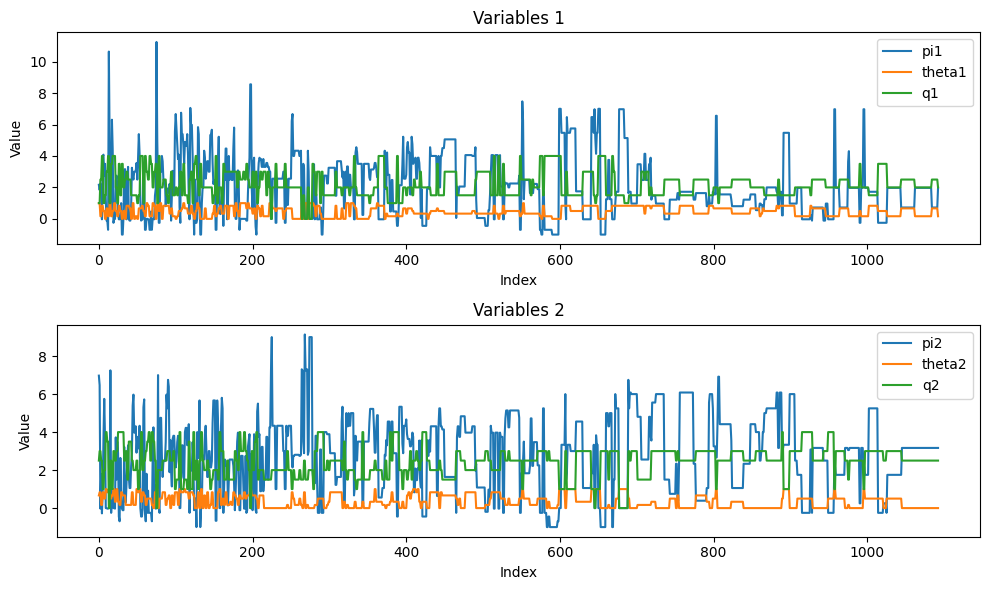

In [4]:
visualize_last_L(pi1_t, pi2_t, theta1_t, theta2_t, q1_t, q2_t)

In [3]:
np.random.seed(Reproduce)
pi1_t, pi2_t, theta1_t, theta2_t, q1_t, q2_t, = simulate_episode_DQN(env, Qs, Thetas, T=1095, gamma=0.95)

In [6]:
def print_groups(name):
    print(name)

current_dir = os.getcwd()
file_path2 = os.path.join(current_dir, '..', '..', 'data', 'simulation_data.h5')

with h5py.File(file_path2, 'r') as file:
    file.visit(print_groups)

Baseline
Baseline/pi1_L
Baseline/pi1_t
Baseline/pi2_L
Baseline/pi2_t
Baseline/q1_L
Baseline/q1_t
Baseline/q2_L
Baseline/q2_t
Baseline/theta1_L
Baseline/theta1_t
Baseline/theta2_L
Baseline/theta2_t
BaselineFinalTest
BaselineFinalTest/pi1_L
BaselineFinalTest/pi1_t
BaselineFinalTest/pi2_L
BaselineFinalTest/pi2_t
BaselineFinalTest/q1_L
BaselineFinalTest/q1_t
BaselineFinalTest/q2_L
BaselineFinalTest/q2_t
BaselineFinalTest/theta1_L
BaselineFinalTest/theta1_t
BaselineFinalTest/theta2_L
BaselineFinalTest/theta2_t
BaselineFinalTest1
BaselineFinalTest1/pi1_L
BaselineFinalTest1/pi1_t
BaselineFinalTest1/pi2_L
BaselineFinalTest1/pi2_t
BaselineFinalTest1/q1_L
BaselineFinalTest1/q1_t
BaselineFinalTest1/q2_L
BaselineFinalTest1/q2_t
BaselineFinalTest1/theta1_L
BaselineFinalTest1/theta1_t
BaselineFinalTest1/theta2_L
BaselineFinalTest1/theta2_t
DQN09
DQN09/pi1_t
DQN09/pi2_t
DQN09/q1_t
DQN09/q2_t
DQN09/theta1_t
DQN09/theta2_t
DQN095Real
DQN095Real/pi1_t
DQN095Real/pi2_t
DQN095Real/q1_t
DQN095Real/q2_t
DQN

In [3]:
current_dir = os.getcwd()
file_path2 = os.path.join(current_dir, '..', '..', 'data', 'simulation_data.h5')
file = h5py.File(file_path2, 'r')
group = file["DQNRun3"]

pi1_L = group['pi1_L'][:]
pi2_L = group['pi2_L'][:]
theta1_L = group['theta1_L'][:]
theta2_L = group['theta2_L'][:]
q1_L = group['q1_L'][:]
q2_L = group['q2_L'][:]

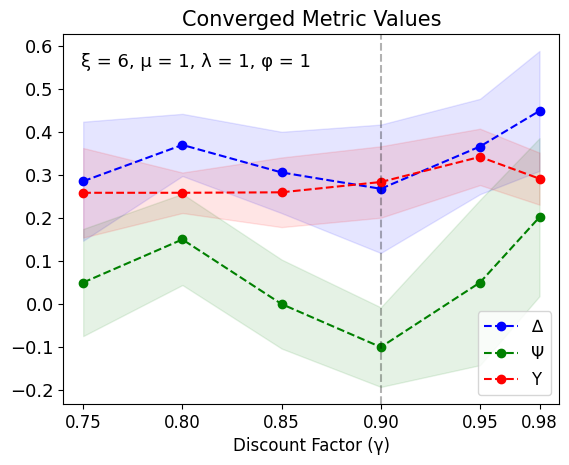

In [11]:
visualize_over_gamma(env, ["GoodDQN075", "GoodDQN08", "GoodDQN085", "GoodDQN09", "GoodDQN095", "GoodDQN098"], n_episodes=20, alt=True)

In [63]:
def visualize_convergence_over_T_DQN(env, groupname):
    current_dir = os.getcwd()
    file_path = os.path.join(current_dir, '..', '..', 'data', 'simulation_data.h5')

    file = h5py.File(file_path, 'r')

    group = file[groupname]

    pi1_t = group['pi1_t'][:]; pi2_t = group['pi2_t'][:]
    theta1_t = group['theta1_t'][:]; theta2_t = group['theta2_t'][:]
    q1_t = group['q1_t'][:]; q2_t = group['q2_t'][:]

    file.close()

    profit = np.vstack((pi1_t, pi2_t))
    q = np.vstack((q1_t, q2_t))
    theta = np.vstack((theta1_t, theta2_t))
                
    collusive_profit, competitive_profit = env.get_profit()
    profit = (profit - competitive_profit) / (collusive_profit - competitive_profit)

    mean_profit = np.mean(profit, axis=0)
    std_profit = np.std(profit, axis=0)

    l = 20
    
    print(std_profit[0], std_profit[-5:])
    confidence_interval_profit = 2.093 * std_profit / np.sqrt(l)

    collusive_q, competitive_q = env.get_q()
    q = (q - competitive_q) / (collusive_q - competitive_q)

    mean_q = np.mean(q, axis=0)
    std_q = np.std(q, axis=0)

    confidence_interval_q = 2.093 * std_q / np.sqrt(l)
    
    collusive_theta, competitive_theta = env.get_theta()
    theta = (theta - competitive_theta) / (collusive_theta - competitive_theta)

    mean_theta = np.mean(theta, axis=0)
    std_theta = np.std(theta, axis=0)

    confidence_interval_theta = 2.093 * std_theta / np.sqrt(l)

    x = np.arange(3, 1096)
    fig, ax = plt.subplots()

    ax.plot(x, mean_profit.T, color='blue', label='∆')
    ax.fill_between(x, mean_profit.T - confidence_interval_profit.T, mean_profit.T + confidence_interval_profit.T,
                    color='b', alpha=0.1)

    ax.plot(x, mean_q.T, color='g', label='Ψ')
    ax.fill_between(x, mean_q.T - confidence_interval_q.T, mean_q.T + confidence_interval_q.T,
                    color='g', alpha=0.1)

    ax.plot(x, mean_theta.T, color='r', label='Υ')
    ax.fill_between(x, mean_theta.T - confidence_interval_theta.T, mean_theta.T + confidence_interval_theta.T,
                    color='r', alpha=0.1)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.xlabel('Months (1 Iteration per Day)', fontsize=12)
    plt.title('Convergence During Episodes', fontsize=15)
    month_ticks = np.arange(0, 1093, step=3*30)  # Generate ticks every 3 months (assuming 30 days per month)
    month_labels = np.arange(0, len(month_ticks)) * 3
    plt.xticks(month_ticks, month_labels, fontsize=13)
    plt.yticks(fontsize=13)
    text = f'γ = {0.9}, ξ = {env.Xi}, μ = {env.Mu}, λ = {env.Lambda}, φ = {env.Phi}'
    plt.annotate(text, xy=(0.5, 0.05), xycoords='axes fraction', ha='center', va='bottom', fontsize=12)
    plt.legend(loc='lower right', fontsize=12)
    plt.show()


1.584655068853408 [0.86909826 0.86909826 0.86909826 0.86909826 0.86909826]


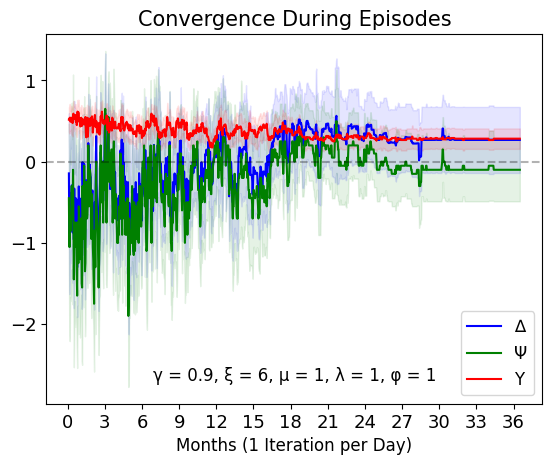

In [64]:
visualize_convergence_over_T_DQN(env, "GoodDQN09")